## Ingestion

First, import the needed python libraries and then read in the water temperature data from a csv file

In [15]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
raw_temps = pd.read_csv("raw_data/water_temps_kok002.csv",header=2)
dt = pd.to_datetime(raw_temps['Timestamp (UTC-08:00)'])
temps = pd.DataFrame({'Timestamp':dt,'Temperature':raw_temps['Value (Celsius)']})

## Process

The data is hourly, with the odd gap. Convert to a monthly average

In [3]:
temps['year'] = temps['Timestamp'].apply(lambda x: x.year)
temps['month'] = temps['Timestamp'].apply(lambda x: x.month)

In [4]:
def build_averages(*groupCols):
    mean_temp = temps.groupby(groupCols).mean()['Temperature']
    var_temp = temps.groupby(groupCols).var()['Temperature']
    return pd.DataFrame({'Mean':mean_temp,'Variance':var_temp}).reset_index()

In [5]:
per_month = build_averages('year','month')
per_month['start_date'] = per_month.apply(lambda x: datetime(year=int(x['year']),month=int(x['month']),day=1),axis=1)

## Present

We can now show off the results. For now, just a simple plot

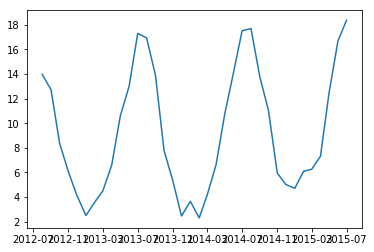

In [6]:
plt.plot(per_month['start_date'],per_month['Mean'])

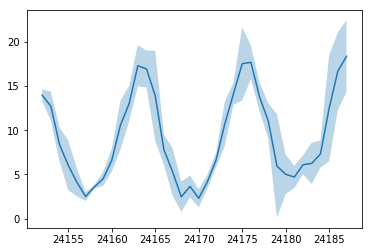

In [7]:
per_month['sd_num'] = per_month.apply(lambda x: x['year']*12 + x['month'],axis=1)
plt.plot(per_month['sd_num'],per_month['Mean'])
per_month['up'] = per_month['Mean'] + per_month['Variance']
per_month['dn'] = per_month['Mean'] - per_month['Variance']
plt.fill_between(per_month['sd_num'], per_month['up'], per_month['dn'], alpha=0.3)

In [8]:
per_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
year          36 non-null int64
month         36 non-null int64
Mean          36 non-null float64
Variance      36 non-null float64
start_date    36 non-null datetime64[ns]
sd_num        36 non-null int64
up            36 non-null float64
dn            36 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 2.3 KB


In [9]:
from scipy import fftpack

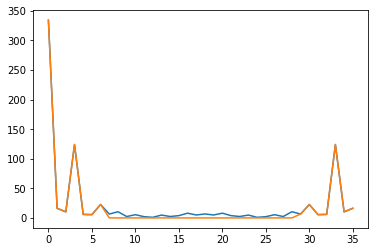

In [51]:
omega = fftpack.fft(per_month["Mean"])
plt.plot(np.abs(omega))
o2 = fftpack.fft(omega)
split = 11
mid = int(len(omega)/2)
for i in range(mid-split,mid+split):
    omega[i] = 0
o3 = fftpack.fft(omega)
plt.plot(np.abs(omega))

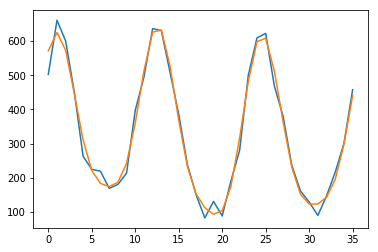

In [50]:
plt.plot(np.abs(o2))
plt.plot(np.abs(o3))
